<a href="https://colab.research.google.com/github/twishackaul/CIFAR-100-Classification/blob/main/NN_CIFAR_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models, layers
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar100.load_data()

169001437/169001437 [==============================] - 3s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

X_train and X_test have 50000 and 10000 data samples respectively each of shape 32*32 with 3 RGB channels

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train.ndim

2

In [8]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

converting 2d to 1d

In [9]:
y_train = y_train.flatten()
y_train[0:5]

array([19, 29,  0, 11,  1])

In [10]:
y_train.ndim

1

In [11]:
y_train.shape

(50000,)

In [12]:
y_test = y_test.flatten()
y_test[0:5]

array([49, 33, 72, 51, 71])

In [13]:
y_test.ndim

1

In [14]:
y_test.shape

(10000,)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]], dtype=uint8)
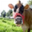

In [15]:
X_train[0]

In [16]:
'''''
Aquatic mammals: 'beaver', 'dolphin', 'otter', 'seal', 'whale'
Fish: 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout'
Flowers: 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips'
Food containers: 'bottles', 'bowls', 'cans', 'cups', 'plates'
Fruit and vegetables: 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers'
Household electrical devices: 'clock', 'computer keyboard', 'lamp', 'telephone', 'television'
Household furniture: 'bed', 'chair', 'couch', 'table', 'wardrobe'
Insects: 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'
Large carnivores: 'bear', 'leopard', 'lion', 'tiger', 'wolf'
Large man-made outdoor things: 'bridge', 'castle', 'house', 'road', 'skyscraper'
Large natural outdoor scenes: 'cloud', 'forest', 'mountain', 'plain', 'sea'
Large omnivores and herbivores: 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'
Medium-sized mammals: 'fox', 'porcupine', 'possum', 'raccoon', 'skunk'
Non-insect invertebrates: 'crab', 'lobster', 'snail', 'spider', 'worm'
People: 'baby', 'boy', 'girl', 'man', 'woman'
Reptiles: 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'
Small mammals: 'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'
Trees: 'maple tree', 'oak tree', 'palm tree', 'pine tree', 'willow tree'
Vehicles 1: 'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train'
Vehicles 2: 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor'

'''''

"''\nAquatic mammals: 'beaver', 'dolphin', 'otter', 'seal', 'whale'\nFish: 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout'\nFlowers: 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips'\nFood containers: 'bottles', 'bowls', 'cans', 'cups', 'plates'\nFruit and vegetables: 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers'\nHousehold electrical devices: 'clock', 'computer keyboard', 'lamp', 'telephone', 'television'\nHousehold furniture: 'bed', 'chair', 'couch', 'table', 'wardrobe'\nInsects: 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'\nLarge carnivores: 'bear', 'leopard', 'lion', 'tiger', 'wolf'\nLarge man-made outdoor things: 'bridge', 'castle', 'house', 'road', 'skyscraper'\nLarge natural outdoor scenes: 'cloud', 'forest', 'mountain', 'plain', 'sea'\nLarge omnivores and herbivores: 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'\nMedium-sized mammals: 'fox', 'porcupine', 'possum', 'raccoon', 'skunk'\nNon-insect invertebrates: 'crab', 'lobster', 'snail

In [18]:
my_class = [
    'beaver', 'dolphin', 'otter', 'seal', 'whale',   # Superclass 0 : aquatic mammals
    'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',   # Superclass 1 : fish
    'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',   # Superclass 2 : flowers
    'bottles', 'bowls', 'cans', 'cups', 'plates',   # Superclass 3 : food containers
    'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',   # Superclass 4 : fruit and vegetables
    'clock', 'computer keyboard', 'lamp', 'telephone', 'television',   # Superclass 5 : household electrical devices
    'bed', 'chair', 'couch', 'table', 'wardrobe',   # Superclass 6 : household furniture
    'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',   # Superclass 7 : insects
    'bear', 'leopard', 'lion', 'tiger', 'wolf',   # Superclass 8 : large carnivores
    'bridge', 'castle', 'house', 'road', 'skyscraper',   # Superclass 9 : large man-made outdoor things
    'cloud', 'forest', 'mountain', 'plain', 'sea',   # Superclass 10 : large natural outdoor scenes
    'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',   # Superclass 11 : large omnivores and herbivores
    'fox', 'porcupine', 'possum', 'raccoon', 'skunk',   # Superclass 12 : medium-sized mammals
    'crab', 'lobster', 'snail', 'spider', 'worm',   # Superclass 13 : non-insect invertebrates
    'baby', 'boy', 'girl', 'man', 'woman',   # Superclass 14 : people
    'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',   # Superclass 15 : reptiles
    'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',   # Superclass 16 : small mammals
    'maple tree', 'oak tree', 'palm tree', 'pine tree', 'willow tree',   # Superclass 17 : trees
    'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',   # Superclass 18 : vehicles 1
    'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor'   # Superclass 19 : vehicles 2
]

my_class.sort()

print(my_class)

['apples', 'aquarium fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottles', 'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cans', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'computer keyboard', 'couch', 'crab', 'crocodile', 'cups', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'lamp', 'lawn-mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple tree', 'motorcycle', 'mountain', 'mouse', 'mushrooms', 'oak tree', 'oranges', 'orchids', 'otter', 'palm tree', 'pears', 'pickup truck', 'pine tree', 'plain', 'plates', 'poppies', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'roses', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflowers', 'sweet peppers', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulips', 'turtle', 'wardrobe'

array([[[ 79, 132, 197],
        [ 79, 132, 197],
        [ 80, 132, 197],
        ...,
        [ 79, 131, 196],
        [ 79, 131, 196],
        [ 79, 131, 196]],

       [[ 82, 136, 201],
        [ 83, 137, 201],
        [ 83, 137, 201],
        ...,
        [ 82, 136, 200],
        [ 82, 136, 200],
        [ 82, 136, 200]],

       [[ 84, 138, 199],
        [ 84, 138, 199],
        [ 85, 139, 200],
        ...,
        [ 84, 137, 199],
        [ 84, 137, 199],
        [ 83, 137, 199]],

       ...,

       [[182, 181, 181],
        [171, 167, 163],
        [218, 209, 201],
        ...,
        [158, 147, 141],
        [189, 175, 168],
        [211, 196, 189]],

       [[197, 186, 178],
        [179, 168, 160],
        [222, 209, 201],
        ...,
        [201, 189, 184],
        [203, 189, 183],
        [208, 194, 188]],

       [[202, 183, 171],
        [199, 182, 171],
        [221, 205, 196],
        ...,
        [206, 193, 190],
        [206, 193, 189],
        [204, 190, 186]]], dtype=uint8)
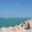

In [19]:
X_train[54]

In [22]:
def plot_image(X, y, index):
  plt.figure(figsize = (15, 2))
  plt.imshow(X[index])
  plt.xlabel(my_class[y[index]])

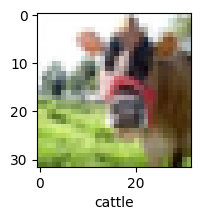

In [23]:
plot_image(X_train, y_train, 0)

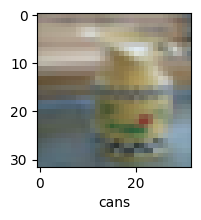

In [24]:
plot_image(X_train, y_train, 699)

In [26]:
X_train = X_train/255
X_test = X_test/255

In [27]:
X_train[54]

array([[[0.30980392, 0.51764706, 0.77254902],
        [0.30980392, 0.51764706, 0.77254902],
        [0.31372549, 0.51764706, 0.77254902],
        ...,
        [0.30980392, 0.51372549, 0.76862745],
        [0.30980392, 0.51372549, 0.76862745],
        [0.30980392, 0.51372549, 0.76862745]],

       [[0.32156863, 0.53333333, 0.78823529],
        [0.3254902 , 0.5372549 , 0.78823529],
        [0.3254902 , 0.5372549 , 0.78823529],
        ...,
        [0.32156863, 0.53333333, 0.78431373],
        [0.32156863, 0.53333333, 0.78431373],
        [0.32156863, 0.53333333, 0.78431373]],

       [[0.32941176, 0.54117647, 0.78039216],
        [0.32941176, 0.54117647, 0.78039216],
        [0.33333333, 0.54509804, 0.78431373],
        ...,
        [0.32941176, 0.5372549 , 0.78039216],
        [0.32941176, 0.5372549 , 0.78039216],
        [0.3254902 , 0.5372549 , 0.78039216]],

       ...,

       [[0.71372549, 0.70980392, 0.70980392],
        [0.67058824, 0.65490196, 0.63921569],
        [0.85490196, 0

#**Artifical Neural Network**

In [28]:
CIFAR = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(5000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(100, activation = 'sigmoid')

])

CIFAR.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [30]:
history = CIFAR.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 254s 162ms/step - loss: 4.0997 - accuracy: 0.0857 - val_loss: 3.8746 - val_accuracy: 0.1098
Epoch 2/10
1563/1563 [==============================] - 252s 161ms/step - loss: 3.7151 - accuracy: 0.1448 - val_loss: 3.6763 - val_accuracy: 0.1506
Epoch 3/10
1563/1563 [==============================] - 244s 156ms/step - loss: 3.5543 - accuracy: 0.1732 - val_loss: 3.5655 - val_accuracy: 0.1673
Epoch 4/10
1563/1563 [==============================] - 253s 162ms/step - loss: 3.4448 - accuracy: 0.1948 - val_loss: 3.5136 - val_accuracy: 0.1833
Epoch 5/10
1563/1563 [==============================] - 252s 161ms/step - loss: 3.3545 - accuracy: 0.2106 - val_loss: 3.4396 - val_accuracy: 0.1960
Epoch 6/10
1563/1563 [==============================] - 258s 165ms/step - loss: 3.2763 - accuracy: 0.2247 - val_loss: 3.4193 - val_accuracy: 0.1996
Epoch 7/10
1563/1563 [==============================] - 254s 162ms/step - loss: 3.2031 - accuracy: 0.2404 - val_

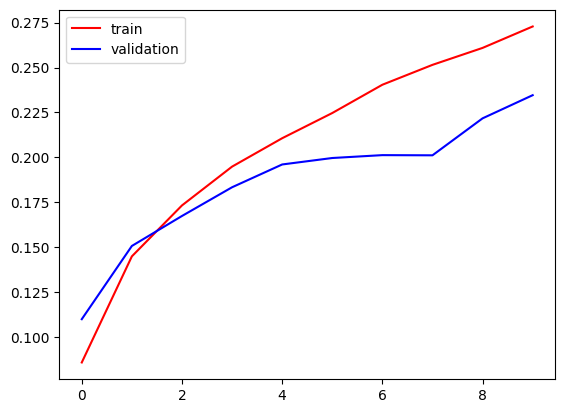

In [31]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

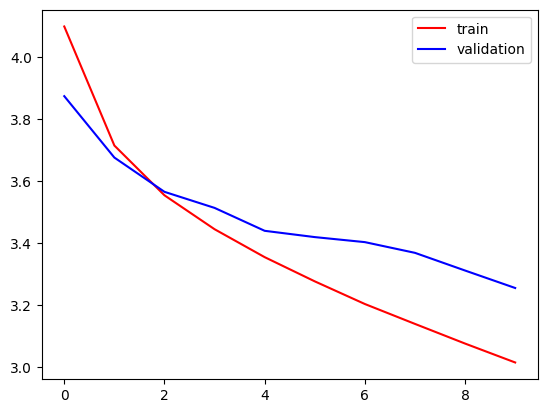

In [32]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [33]:
y_predA = CIFAR.predict(X_test)

313/313 [==============================] - 13s 42ms/step


In [34]:
y_predA[0]

array([0.02192388, 0.29152003, 0.7702045 , 0.85214317, 0.83458424,
       0.78787965, 0.29648525, 0.49271122, 0.9466428 , 0.67170215,
       0.6971873 , 0.7834253 , 0.9768292 , 0.63400227, 0.03536234,
       0.38425958, 0.49277478, 0.8945144 , 0.2553783 , 0.33353874,
       0.3521062 , 0.2677064 , 0.3851627 , 0.96137005, 0.60469705,
       0.8719578 , 0.8003618 , 0.4049464 , 0.51516557, 0.46740714,
       0.8468634 , 0.32484752, 0.7464154 , 0.16947776, 0.21058713,
       0.42248505, 0.19175155, 0.8035698 , 0.28154442, 0.90401787,
       0.76871735, 0.3976234 , 0.11471488, 0.05409815, 0.5542031 ,
       0.64195967, 0.7505966 , 0.14110003, 0.8655332 , 0.99207747,
       0.45201468, 0.0706888 , 0.01001506, 0.00110207, 0.8202415 ,
       0.862238  , 0.44354105, 0.02644956, 0.8528431 , 0.6704696 ,
       0.2828265 , 0.1625196 , 0.3797922 , 0.34732592, 0.21881688,
       0.4881934 , 0.2244713 , 0.6982676 , 0.6677047 , 0.77101356,
       0.27729407, 0.95644224, 0.88597447, 0.77086806, 0.13657

In [35]:
y_predA_new = [np.argmax(i) for i in y_predA]

In [36]:
y_predA_new[:10]

[49, 38, 15, 10, 71, 6, 63, 7, 23, 10]

In [37]:
y_test[:10]

array([49, 33, 72, 51, 71, 92, 15, 14, 23,  0])

##Confusion Matrix

In [38]:
CM = tf.math.confusion_matrix(labels = y_test, predictions = y_predA_new)
CM

<tf.Tensor: shape=(100, 100), dtype=int32, numpy=
array([[50,  1,  1, ...,  0,  0,  0],
       [ 3, 27,  2, ...,  0,  0,  0],
       [ 4,  0, 22, ...,  1,  7,  2],
       ...,
       [ 0,  0,  5, ...,  7,  1,  0],
       [ 2,  0, 13, ...,  0,  9,  0],
       [ 1,  0,  1, ...,  0,  0, 15]], dtype=int32)>

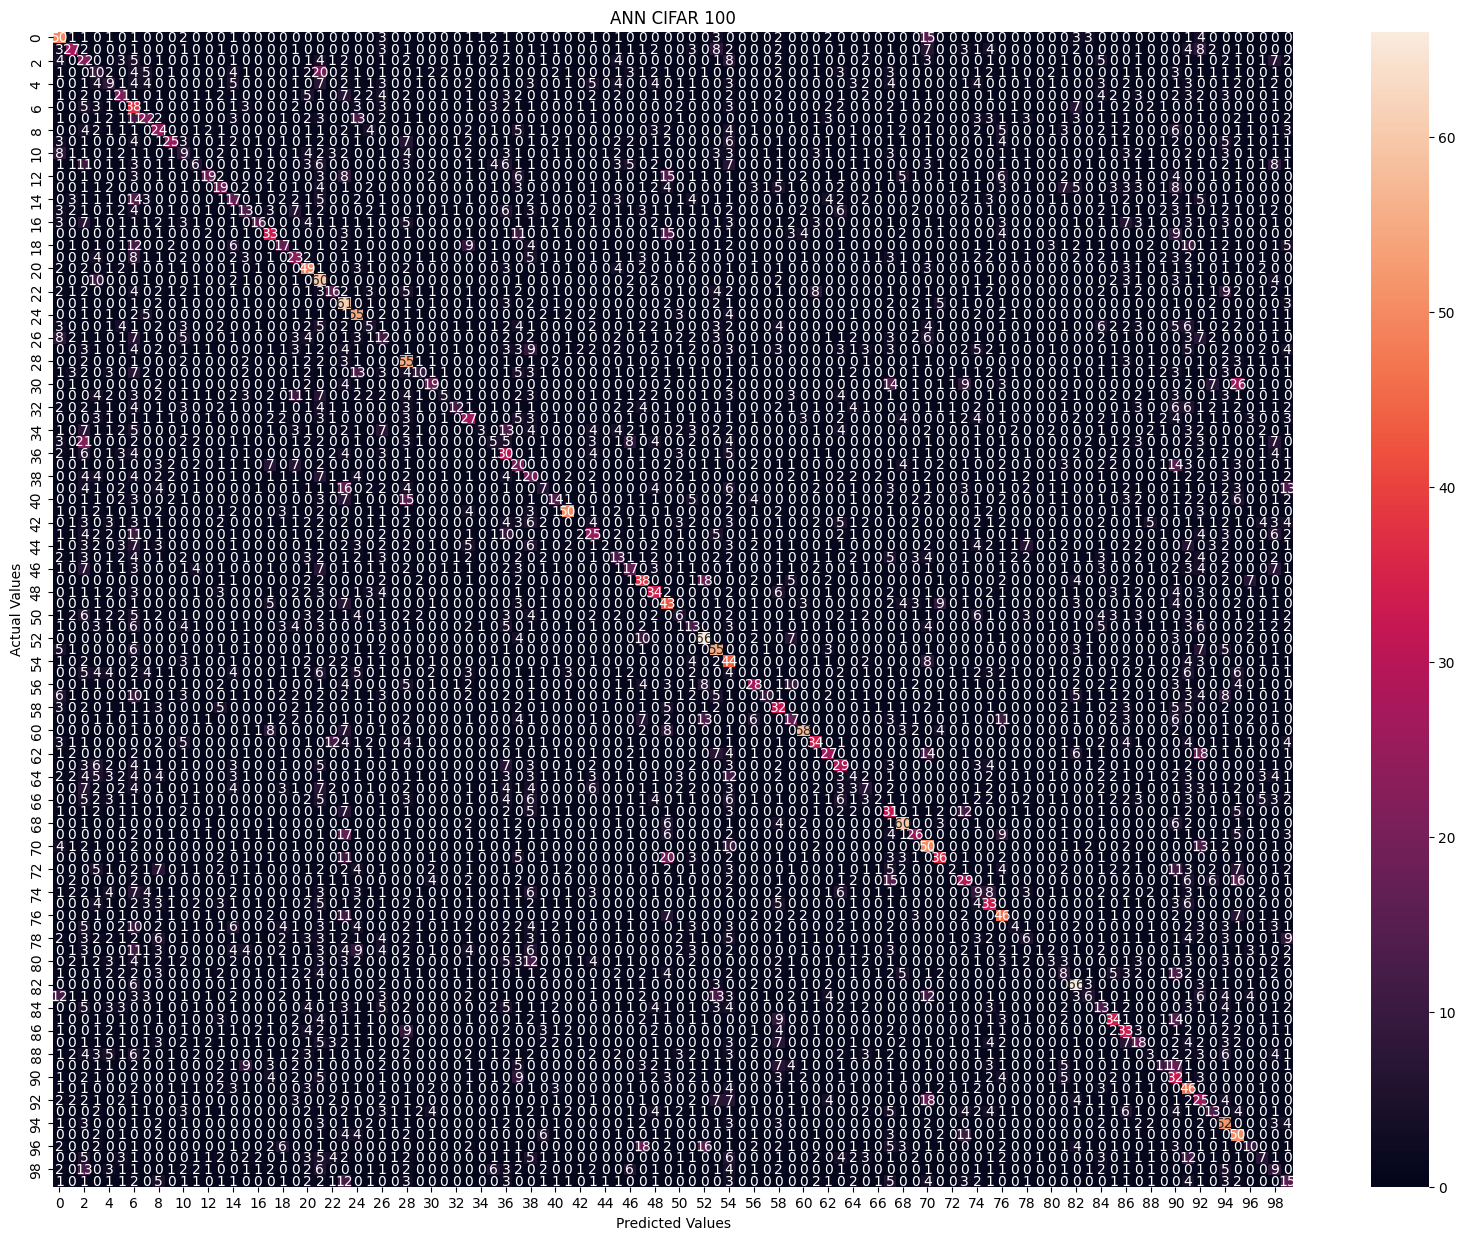

In [39]:
plt.figure(figsize = (20,15))
sns.heatmap(CM, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('ANN CIFAR 100')
plt.show()

#**Convolutional Neural Network**

In [40]:
CNN = Sequential()

CNN.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (32, 32, 3)))
CNN.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

CNN.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
CNN.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

CNN.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
CNN.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

CNN.add(Flatten())

CNN.add(Dense(128, activation = 'relu'))
CNN.add(Dense(64, activation = 'relu'))
CNN.add(Dense(100, activation = 'softmax'))

CNN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [41]:
history = CNN.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 90s 57ms/step - loss: 4.0237 - accuracy: 0.0791 - val_loss: 3.6238 - val_accuracy: 0.1421
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 3.4275 - accuracy: 0.1742 - val_loss: 3.2255 - val_accuracy: 0.2145
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 3.1160 - accuracy: 0.2313 - val_loss: 3.0770 - val_accuracy: 0.2426
Epoch 4/10
1563/1563 [==============================] - 86s 55ms/step - loss: 2.8961 - accuracy: 0.2722 - val_loss: 2.9301 - val_accuracy: 0.2710
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 2.7316 - accuracy: 0.3072 - val_loss: 2.8604 - val_accuracy: 0.2848
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 2.6002 - accuracy: 0.3355 - val_loss: 2.7599 - val_accuracy: 0.3119
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 2.4900 - accuracy: 0.3583 - val_loss: 2.6680 -

In [42]:
y_pred = CNN.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [43]:
y_pred[0:5]

array([[8.90090541e-06, 2.94836529e-04, 1.19007658e-02, 1.04805711e-03,
        7.70005863e-04, 1.53276855e-02, 3.84176965e-05, 5.55453938e-04,
        3.41383344e-03, 2.63990229e-03, 1.96316489e-03, 5.23679378e-03,
        7.63681997e-03, 2.36997294e-04, 3.96560528e-04, 7.44524878e-05,
        2.48006871e-03, 2.82427045e-05, 2.40086229e-03, 2.39865942e-04,
        8.41634534e-03, 3.08068295e-04, 1.88041816e-03, 2.11361144e-02,
        3.21489084e-03, 1.11928396e-02, 4.64583933e-03, 5.35005890e-03,
        2.67582783e-03, 3.66602588e-04, 1.83141902e-01, 1.31214139e-04,
        5.18163713e-03, 6.39058053e-05, 3.11295415e-04, 3.10711842e-03,
        2.27244036e-05, 5.28468343e-04, 1.29107630e-03, 2.33180076e-01,
        6.05731644e-03, 1.58520020e-03, 1.11327405e-04, 4.58228715e-06,
        1.54920658e-02, 2.80910768e-02, 5.12728980e-03, 1.22113943e-05,
        3.38192302e-04, 6.35937275e-03, 1.26269809e-03, 3.37623023e-05,
        8.50385106e-07, 6.24946438e-07, 5.37767133e-04, 6.431161

In [44]:
y_pred_new = [np.argmax(i) for i in y_pred]

In [45]:
y_pred_new[0:5]

[39, 33, 4, 91, 71]

In [46]:
y_test[0:5]

array([49, 33, 72, 51, 71])

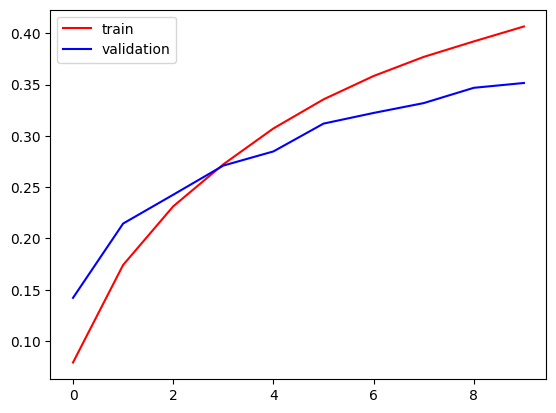

In [47]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

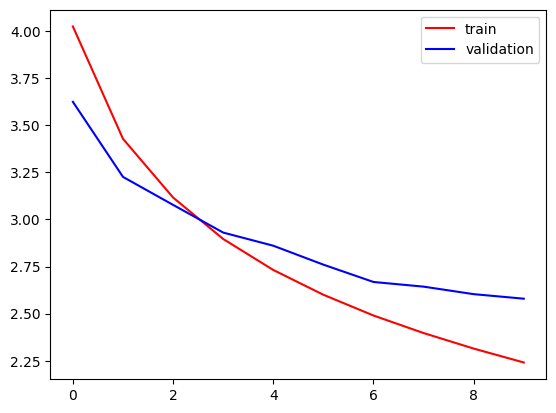

In [48]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_new, average='macro')
recall = recall_score(y_test, y_pred_new, average='macro')
f1 = f1_score(y_test, y_pred_new, average='macro')

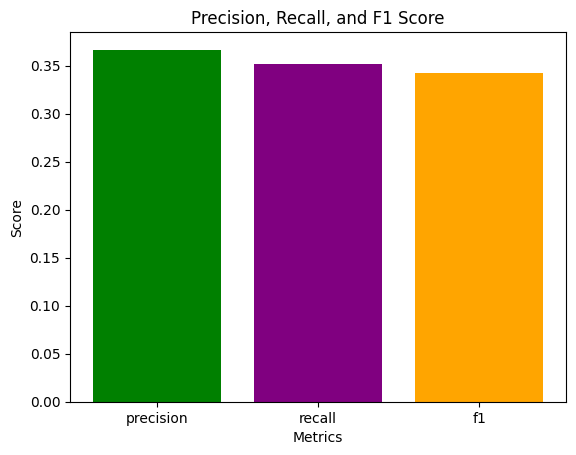

In [62]:
metrics = {'precision': precision, 'recall': recall, 'f1': f1}

plt.bar(metrics.keys(), metrics.values(), color=['green', 'purple', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score')
plt.show()

In [49]:
CM_CNN = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_new)
CM_CNN

<tf.Tensor: shape=(100, 100), dtype=int32, numpy=
array([[68,  1,  3, ...,  0,  0,  1],
       [ 2, 53,  1, ...,  1,  0,  1],
       [ 3,  1, 55, ...,  0,  2,  1],
       ...,
       [ 0,  0,  3, ..., 28,  0,  0],
       [ 1,  0, 16, ...,  0, 14,  1],
       [ 0,  0,  3, ...,  0,  1, 27]], dtype=int32)>

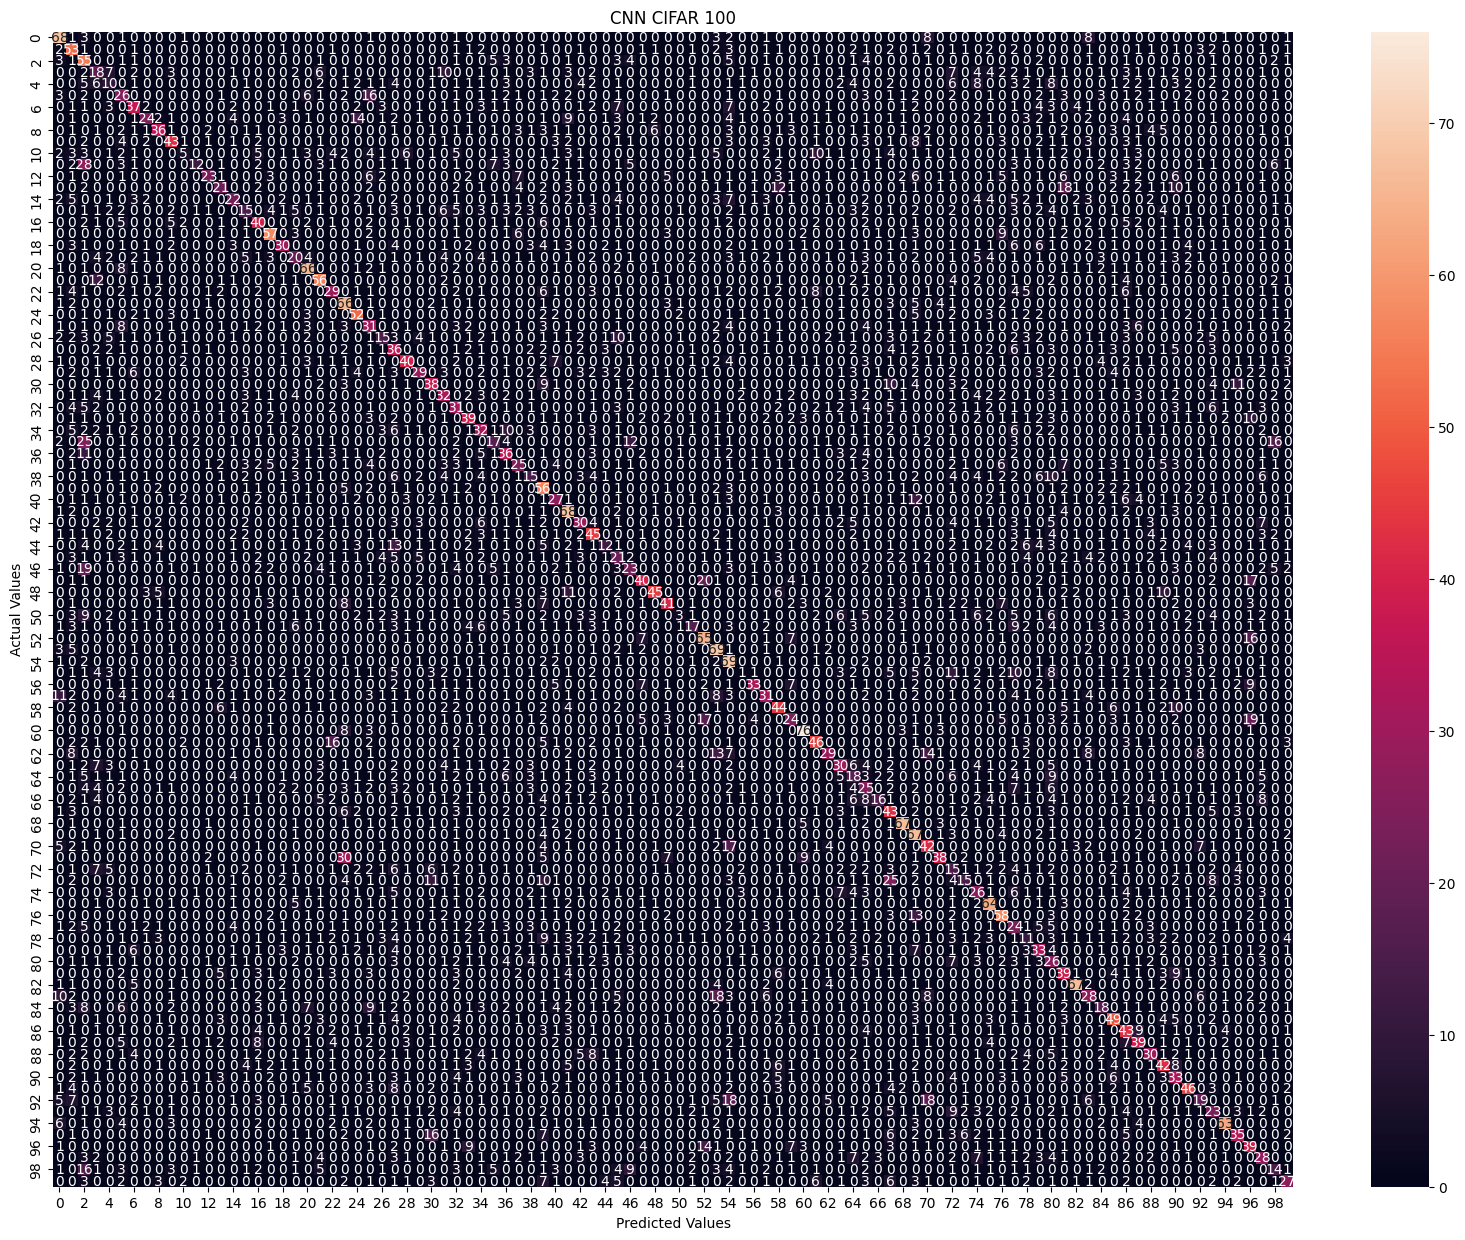

In [50]:
plt.figure(figsize = (20, 15))
sns.heatmap(CM_CNN, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('CNN CIFAR 100')
plt.show()

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.48      0.68      0.56       100
           1       0.31      0.53      0.39       100
           2       0.21      0.55      0.31       100
           3       0.19      0.18      0.18       100
           4       0.14      0.10      0.12       100
           5       0.22      0.26      0.24       100
           6       0.39      0.37      0.38       100
           7       0.52      0.24      0.33       100
           8       0.51      0.36      0.42       100
           9       0.47      0.43      0.45       100
          10       0.22      0.05      0.08       100
          11       0.55      0.12      0.20       100
          12       0.57      0.23      0.33       100
          13       0.36      0.21      0.27       100
          14       0.36      0.22      0.27       100
          15       0.25      0.15      0.19       100
          16       0.38      0.40      0.39       100
          17       0.60    

In [53]:
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)        